In [123]:
import os
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [124]:
results_folder = '../benchmarks/snakes/'
results = []
for csv_file in os.scandir(results_folder):
    raw_benchmark_results = pd.read_csv(csv_file.path)
    results_table = raw_benchmark_results.pivot(index='d', columns='k', values='comparisons')
    results.append((csv_file.name, results_table))

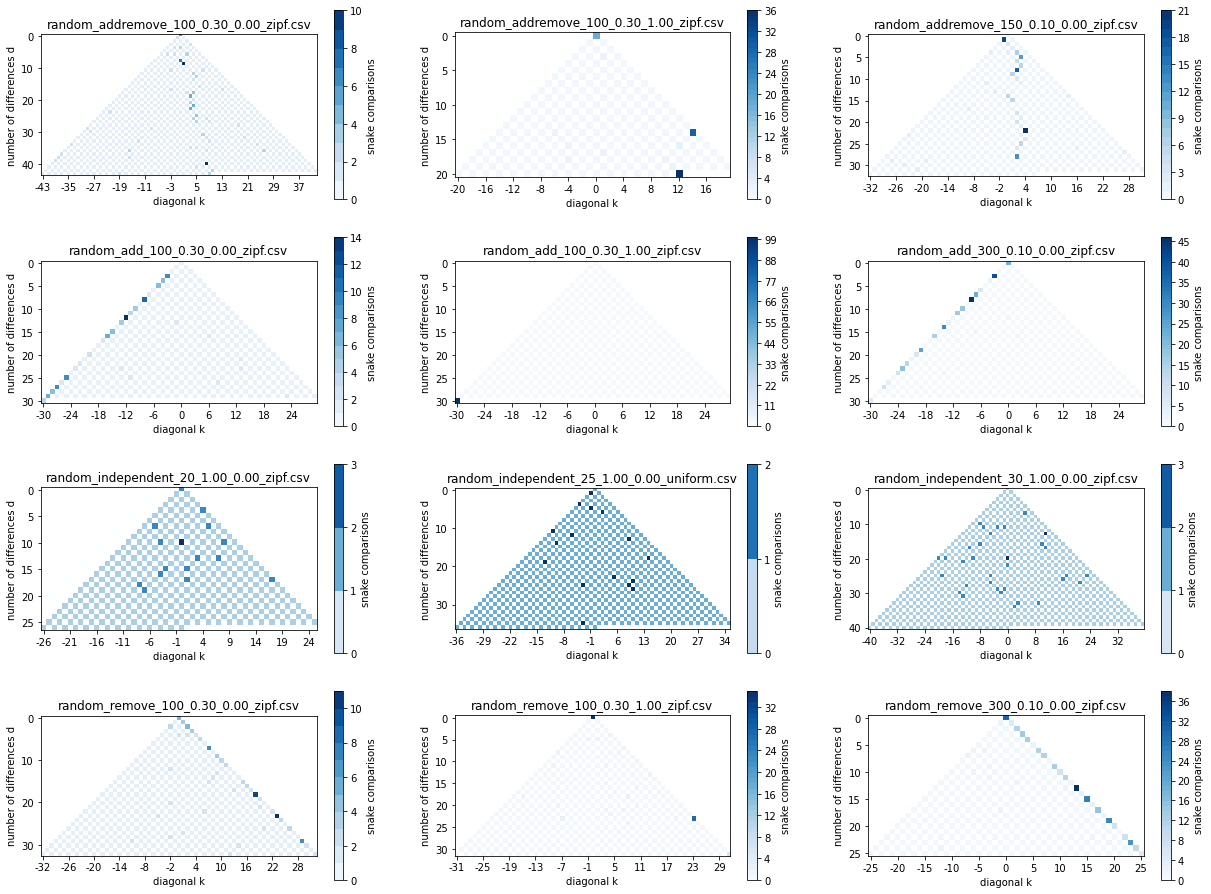

In [125]:
fig, ax = plt.subplots(math.ceil(len(results) / 3), 3, figsize=(21, math.ceil(len(results) / 3) * 4))

n_x_ticks = 10
for idx, (test_case, results_table) in enumerate(results):
    subplot = ax[idx // 3, idx % 3]
    subplot.set_title(test_case)
    subplot.set_xlabel('diagonal k')
    subplot.set_ylabel('number of differences d')
    x_ticks_difference = len(results_table.columns) // n_x_ticks
    subplot.set_xticks(np.arange(0, len(results_table.columns), x_ticks_difference))
    subplot.set_xticklabels(results_table.columns[0:len(results_table.columns):x_ticks_difference])
    heatmap = subplot.imshow(results_table, cmap='Blues', vmin=0)
    bounds = list(range(int(results_table.max().max()) + 1))
    colorbar = plt.colorbar(heatmap, boundaries=bounds, ax=subplot)
    colorbar.set_label('snake comparisons')
